In [76]:
import numpy as np
import seaborn as sns
import pandas as pd

In [77]:
subject_name = "Helenö"


In [78]:
""" Load the data from the csv file and perform the analysis."""
data = pd.read_csv('./Savings/error_angles_{}.csv'.format(subject_name))
data.trial_name.unique()
data.head(5)

,subject_name,target_mode,perturbation_type,trial_number,trial_name,feedback_type,target_pos,changed_angels,error_angles,perturbed_angels
0,Helenö,sequence,gradual,1,No Perturbation,no,"[960.8362829059618, 202.1866670643066]",40,0.127603,0.0
1,Helenö,sequence,gradual,2,No Perturbation,no,"[960.8362829059618, 202.1866670643066]",40,-0.158274,0.0
2,Helenö,sequence,gradual,3,No Perturbation,no,"[960.8362829059618, 202.1866670643066]",40,0.041003,0.0
3,Helenö,sequence,gradual,4,No Perturbation,no,"[960.8362829059618, 202.1866670643066]",40,-0.040834,0.0
4,Helenö,sequence,gradual,5,No Perturbation,no,"[960.8362829059618, 202.1866670643066]",40,-0.088103,0.0


In [79]:
""" Calulate the motor varibility or the std for each baseline and each trial."""
MV = data[data['trial_name'] == 'No Perturbation']['error_angles'].std()
print(MV)

""" Create an array of the error angles for each trial."""
error_angels_arr = np.array(np.abs(data[data['trial_name'] != 'No Perturbation']['error_angles']))

""" Calculate the adaptation rate for each trial."""
""" Choose for each trial the maximum between the error angle and the motor variability."""
adaptation_rate = np.where(MV / error_angels_arr > 1, 1, MV / error_angels_arr) * 100

trials_number_adapt = data[data['trial_name'] != 'No Perturbation'].trial_number
hue_trials = data[data['trial_name'] != 'No Perturbation'].changed_angels

0.07789027863149785


C:\Users\Lotta\AppData\Local\Temp\ipykernel_4176\848575982.py:10: RuntimeWarning: divide by zero encountered in true_divide
  adaptation_rate = np.where(MV / error_angels_arr > 1, 1, MV / error_angels_arr) * 100


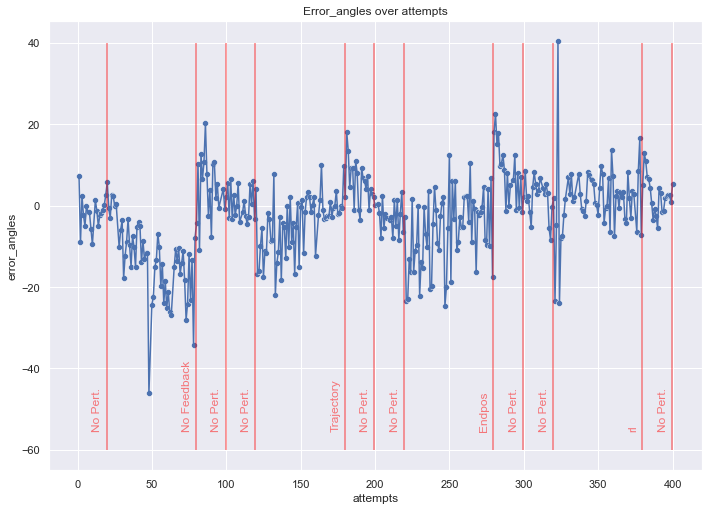

In [80]:
"""Plot the basic error angles over trial like last week"""

a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11,a12,a13 = 0, 20, 80, 100,120, 180, 200,220, 280, 300, 320, 380, 400
collect_attempts = [a2, a3, a4, a5, a6, a7, a8, a9, a10,a11,a12,a13]
string_attempts = [ 'No Pert.', 'No Feedback', 'No Pert.',
                   'No Pert.', 'Trajectory', 'No Pert.',
                   'No Pert.', 'Endpos', 'No Pert.',
                   'No Pert.', 'rl', 'No Pert.']

attempts = 400


data["error_angles"] = np.degrees(data["error_angles"])
g0 = sns.scatterplot(data = data, x = 'trial_number', y = 'error_angles') 
g0 = sns.lineplot(data = data, x = 'trial_number', y = 'error_angles')
""" Add vertical lines to show the different pertubation_types."""
g0.vlines(np.array(collect_attempts) - 0.5, ymin = -60, ymax = 40, color = 'red', alpha = 0.5)
""" Add labels to the vertical lines."""
for i in range(len(collect_attempts)):
    g0.text(collect_attempts[i] - 10, -55, string_attempts[i], rotation = 90, color = 'red', alpha = 0.5)
g0.set(xlabel='attempts', ylabel='error_angles', title = 'Error_angles over attempts')
sns.set(rc={'figure.figsize':(17,8)})
g0.figure.savefig("Plots/error_angles_"+ subject_name + ".png")
g0.figure.savefig("Plots/error_angles_"+ subject_name + ".svg")

In [81]:
""" Quantify the aftereffect."""


trials_numer_aftereffect = data[data['trial_name'] == 'Aftereffect'].trial_number

""" Create an array of the error angles for each trial."""
error_angels_arr = np.array(np.abs(data[data['trial_name'] == 'Aftereffect']['error_angles']))
hue_trials = data[data['trial_name'] == 'Aftereffect'].changed_angels

""" Calculate the adaptation rate for each trial."""
""" Choose for each trial the maximum between the error angle and the motor variability."""
adaptation_rate = np.where(MV / error_angels_arr > 1, 1, MV / error_angels_arr) * 100

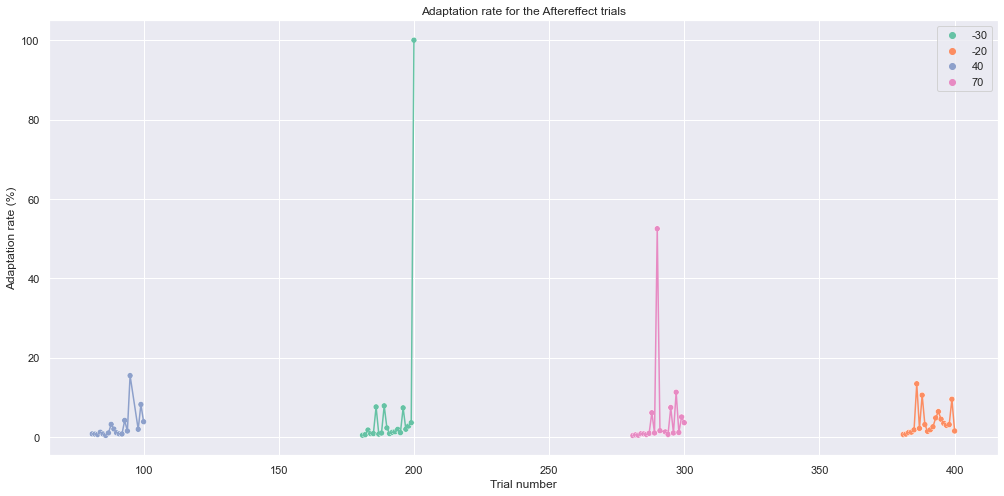

In [82]:
g0 = sns.scatterplot(x= trials_numer_aftereffect, y= adaptation_rate, hue = hue_trials, palette = 'Set2')
g0 = sns.lineplot(x= trials_numer_aftereffect, y= adaptation_rate, hue = hue_trials, palette = 'Set2')
""" Make only one legend for the two plots."""
handles, labels = g0.get_legend_handles_labels()
g0.legend(handles=handles[:4], labels=labels[:4])

g0.set(xlabel='Trial number', ylabel='Adaptation rate (%)', title = 'Adaptation rate for the Aftereffect trials')


g0.figure.savefig("Plots/aftereffect_error_adaptation"+ str(data.subject_name.unique()[0]) + ".svg")
g0.figure.savefig("Plots/aftereffect_error_adaptation"+ str(data.subject_name.unique()[0]) + ".png")

In [83]:
""" Create a dataframe with the adaptation rate and the trial_number."""
trials_number_aftereffect = data[data['trial_name'] == 'Aftereffect'].trial_number
error_angles = data[data['trial_name'] == 'Aftereffect']['error_angles']

MV_error = np.abs(error_angles) / MV
hue_no_pert = data[data['trial_name'] == 'Aftereffect'].changed_angels


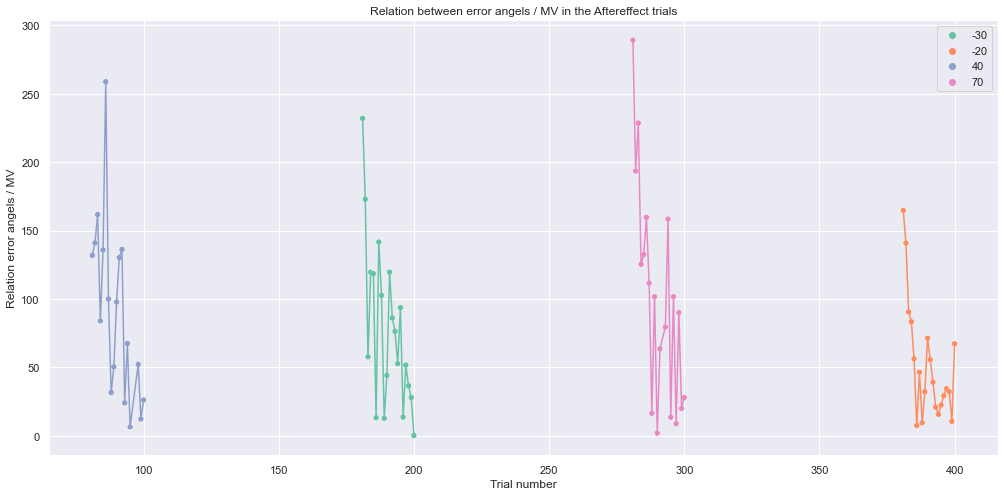

In [84]:
""" Quantify the aftereffect by calculating the relation between the error angels and the MV."""

g1 = sns.scatterplot(x= trials_number_aftereffect, y= MV_error, hue = hue_no_pert,  palette = 'Set2')

g1 = sns.lineplot(x= trials_number_aftereffect, y= MV_error, hue = hue_no_pert,  palette = 'Set2')
""" Make only one legend for the two plots."""
handles, labels = g1.get_legend_handles_labels()
g1.legend(handles=handles[:4], labels=labels[:4])

g1.set(xlabel='Trial number', ylabel='Relation error angels / MV', title = 'Relation between error angels / MV in the Aftereffect trials')

g1.figure.savefig("Plots/aftereffect_relation_error_MV"+ str(data.subject_name.unique()[0]) + ".svg")
g1.figure.savefig("Plots/aftereffect_relation_error_MV"+ str(data.subject_name.unique()[0]) + ".png")